In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    auc,
    balanced_accuracy_score,
    roc_curve,
)

LOADING THE DAATSET "Air_Bnb".

In [125]:
folder_path = "D:/Trainee_Upskilling/Air_Bnb_Week1/Air_Bnb/"
df = pd.read_csv(folder_path + "AB_NYC_2019.csv")

In [126]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [127]:
df.shape

(48895, 16)

In [128]:
missing_values = df.isnull()
total_missing = missing_values.sum()
total_missing

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

AS WE CAN SEE THE MISSING VALUES IS HIGHER FOR "last_review" and "reviews_per_month". We will be further looking into these features. 

In [129]:
value_counts = df["reviews_per_month"].value_counts(dropna=False).to_dict()

value_counts

{nan: 10052,
 0.02: 919,
 1.0: 893,
 0.05: 893,
 0.03: 804,
 0.16: 667,
 0.04: 655,
 0.08: 596,
 0.09: 593,
 0.06: 579,
 0.11: 539,
 0.07: 466,
 0.13: 463,
 0.1: 457,
 0.12: 413,
 2.0: 406,
 0.14: 399,
 0.15: 374,
 0.19: 357,
 0.21: 343,
 0.17: 321,
 0.22: 318,
 0.26: 305,
 0.18: 305,
 0.25: 290,
 0.23: 289,
 0.32: 280,
 0.27: 277,
 0.2: 276,
 0.24: 266,
 0.28: 264,
 0.3: 250,
 0.31: 248,
 0.29: 229,
 0.42: 227,
 0.33: 223,
 3.0: 222,
 0.38: 217,
 0.36: 208,
 0.37: 201,
 0.39: 187,
 0.41: 186,
 0.43: 183,
 0.47: 182,
 0.45: 178,
 0.46: 175,
 0.35: 174,
 0.48: 168,
 0.4: 167,
 0.34: 165,
 0.53: 163,
 0.44: 160,
 0.52: 152,
 0.55: 149,
 0.58: 146,
 0.59: 146,
 0.49: 144,
 0.77: 143,
 0.63: 143,
 0.65: 136,
 0.5: 132,
 0.68: 131,
 0.7: 131,
 0.61: 130,
 4.0: 130,
 0.57: 125,
 0.56: 125,
 0.81: 123,
 0.71: 118,
 0.54: 117,
 0.51: 114,
 0.76: 114,
 0.6: 112,
 0.73: 112,
 0.67: 112,
 0.64: 111,
 0.85: 111,
 0.79: 110,
 0.91: 106,
 0.62: 105,
 0.66: 105,
 0.94: 103,
 0.75: 101,
 0.74: 98,
 0.

In [130]:
"""As 'reviews_per_month' is null so it can be replaces by 0. 
"""
df["reviews_per_month"].fillna(0, inplace=True)

In [131]:
df["last_review"]

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [132]:
df["host_name"]

0                 John
1             Jennifer
2            Elisabeth
3          LisaRoxanne
4                Laura
             ...      
48890          Sabrina
48891          Marisol
48892    Ilgar & Aysel
48893              Taz
48894       Christophe
Name: host_name, Length: 48895, dtype: object

In [133]:
"""'last_review' consist of date, it is irrelevant for price prediction. 'host_name' consist the human name so it is irrelevant too. 
So let's drop this colummns. """

df.drop("last_review", axis=1, inplace=True)

In [134]:
df.drop("host_name", axis=1, inplace=True)

In [135]:
missing_values = df.isnull()
total_missing = missing_values.sum()
total_missing

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

UNIQUE ELEMENTS ASSOCIATED WITH EACH FEATURE.

In [136]:
for x in df.columns:
    unique_values = df[x].unique().tolist()
    print(f"Column: {x}")
    print(unique_values)
    print("\n")

Column: id
[2539, 2595, 3647, 3831, 5022, 5099, 5121, 5178, 5203, 5238, 5295, 5441, 5803, 6021, 6090, 6848, 7097, 7322, 7726, 7750, 7801, 8024, 8025, 8110, 8490, 8505, 8700, 9357, 9518, 9657, 9668, 9704, 9782, 9783, 10452, 10962, 11452, 11708, 11943, 12048, 12192, 12299, 12303, 12318, 12343, 12627, 12937, 12940, 13050, 13394, 13808, 14287, 14290, 14314, 14322, 14377, 14991, 15220, 15338, 15341, 15385, 15396, 15711, 16326, 16338, 16421, 16458, 16580, 16595, 16821, 16974, 17037, 17092, 17693, 17747, 18127, 18152, 18198, 18590, 18728, 18764, 19159, 19169, 19282, 19319, 19601, 19812, 20299, 20300, 20611, 20724, 20734, 20755, 20853, 20913, 21293, 21456, 21644, 21794, 22911, 22918, 23135, 23501, 23686, 24143, 24285, 25235, 25406, 25696, 26012, 26362, 26520, 26559, 26785, 26933, 26954, 26969, 27006, 27385, 27531, 27644, 27659, 27759, 27883, 28321, 28396, 28907, 29012, 29013, 29455, 29628, 29683, 30031, 30927, 31130, 31555, 31902, 31994, 32023, 32037, 32100, 32289, 32331, 32363, 32965, 32969, 

In [137]:
df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


WE WILL BE LOOKING AT ALL THE CATEGORICAL VARIABLES.

In [138]:
"""Categorical variables."""
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [139]:
df["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [140]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

EXPLORATORY DATA ANALYSIS

In [141]:
"""EXPLORATORY DATA ANALYSIS"""

"""neighbourhood_group"""

neighbourhood_group = df["neighbourhood_group"].value_counts()
neighbourhood_group

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

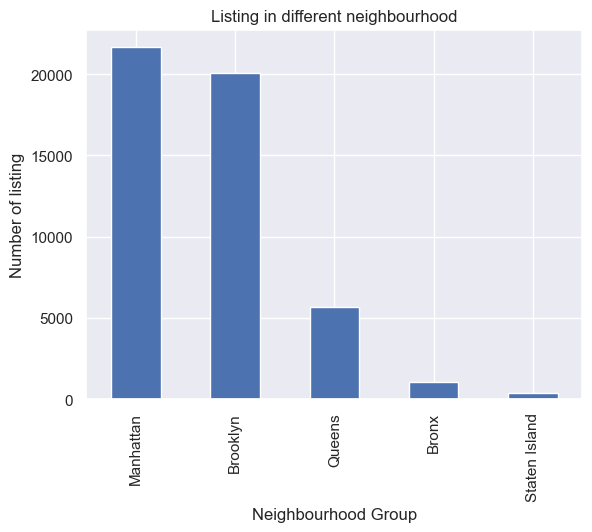

In [142]:
neighbourhood_group.plot(kind="bar")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of listing")
plt.title("Listing in different neighbourhood")
plt.show()

In [143]:
"""
From above bar diagram we can see that neighbourhood Manhattan and Brooklyn has highest number of listing which 
is around 20000 and for other neighbourhood it's below 6000. So, we ca n analyze the importnat neighbourhood.
"""

"\nFrom above bar diagram we can see that neighbourhood Manhattan and Brooklyn has highest number of listing which \nis around 20000 and for other neighbourhood it's below 6000. So, we ca n analyze the importnat neighbourhood.\n"

In [144]:
"""room_type"""

room_type = df["room_type"].value_counts()
room_type

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

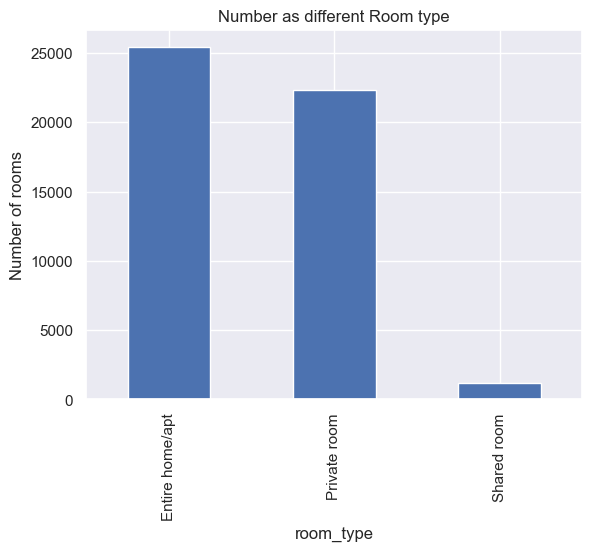

In [145]:
room_type.plot(kind="bar")
plt.xlabel("room_type")
plt.ylabel("Number of rooms")
plt.title("Number as different Room type")
plt.show()

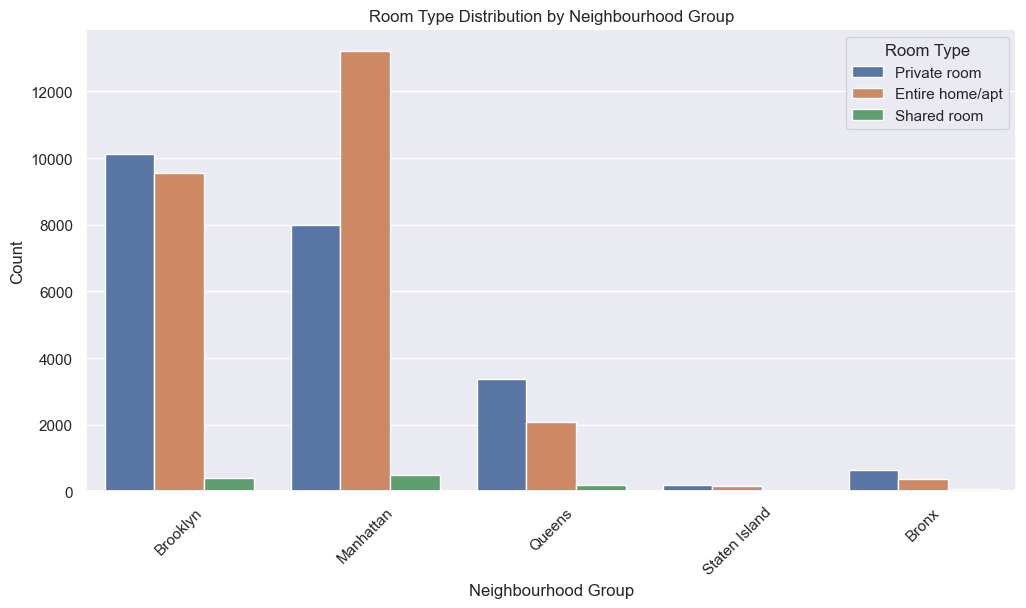

In [146]:
"""
As neighbourhood group consist of the name of the cities, so we analyze the type of room and their 
count present in the given neighbourhood. 
"""

sns.set(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="neighbourhood_group", hue="room_type")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count")
plt.title("Room Type Distribution by Neighbourhood Group")
plt.xticks(rotation=45)
plt.legend(title="Room Type")

plt.show()

In [147]:
"""
From above analysis we can see people usually don't prefer the shared rooms.
They are more keen towards private rooms and entire home.
"""

"\nFrom above analysis we can see people usually don't prefer the shared rooms.\nThey are more keen towards private rooms and entire home.\n"

In [148]:
grouped_data = df.groupby(["neighbourhood_group", "neighbourhood"])
print(grouped_data)

In [149]:
grouped_count = grouped_data.size().reset_index(name="count")

print(grouped_count)

    neighbourhood_group  neighbourhood  count
0                 Bronx       Allerton     42
1                 Bronx     Baychester      7
2                 Bronx        Belmont     24
3                 Bronx      Bronxdale     19
4                 Bronx    Castle Hill      9
..                  ...            ...    ...
216       Staten Island    Tottenville      7
217       Staten Island  West Brighton     18
218       Staten Island    Westerleigh      2
219       Staten Island    Willowbrook      1
220       Staten Island        Woodrow      1

[221 rows x 3 columns]


In [150]:
"""We can see the relationship between neighbourhood_group  and neighbourhood  from above."""

'We can see the relationship between neighbourhood_group  and neighbourhood  from above.'

In [151]:
df.columns

Index(['id', 'name', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [152]:
""" 
Let's observe the types of each features and select the numerical one to analyze them further.
"""
df.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [153]:
""""Correlation of numerical columns """
selected_columns = [
    "host_id",
    "latitude",
    "longitude",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
    "availability_365",
    "price",
]

CORRELATION BETWEEN THE NUMERICAL COLUMNS

<Axes: >

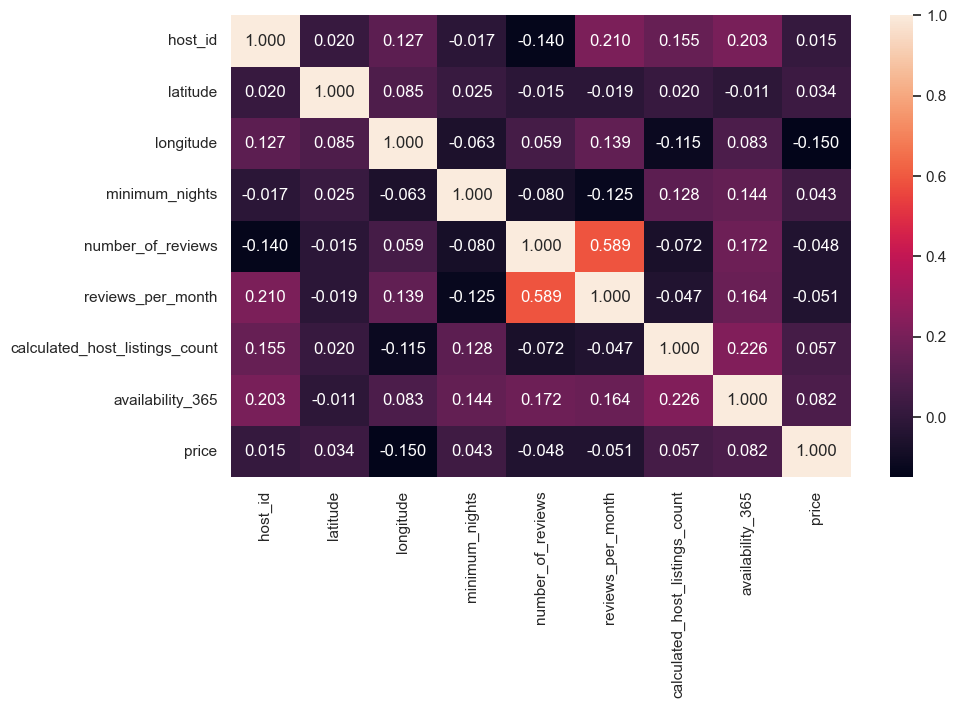

In [154]:
new_df = df[selected_columns]

correlation_matrix = new_df.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".3f")

HISTOGRAM PLOT FOR NUMERICAL COLUMNS

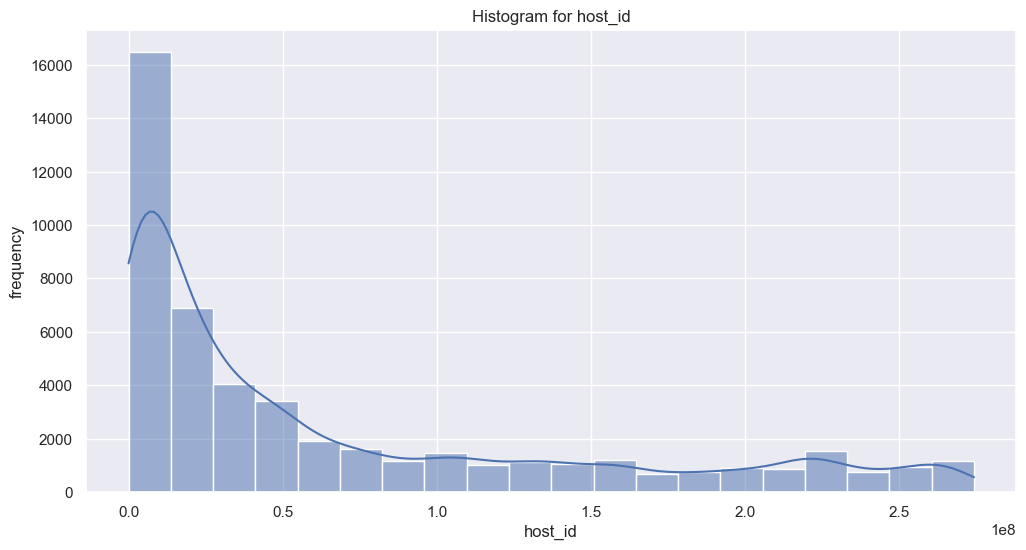

count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
25%      7.822033e+06
50%      3.079382e+07
75%      1.074344e+08
max      2.743213e+08
Name: host_id, dtype: float64


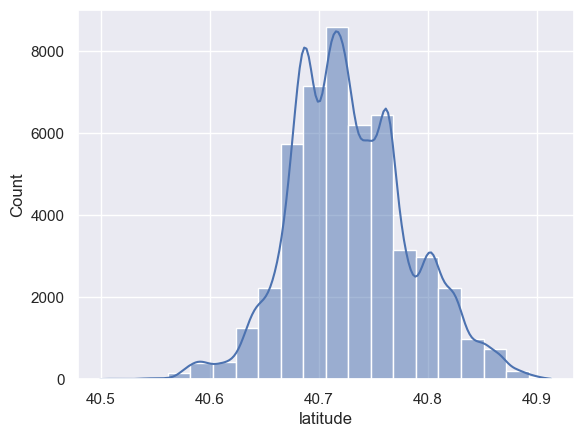

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64


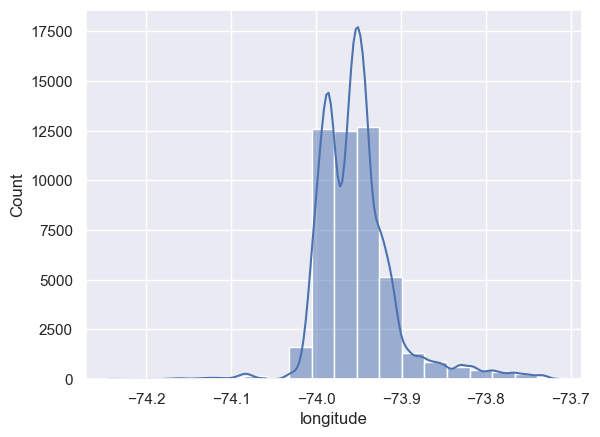

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64


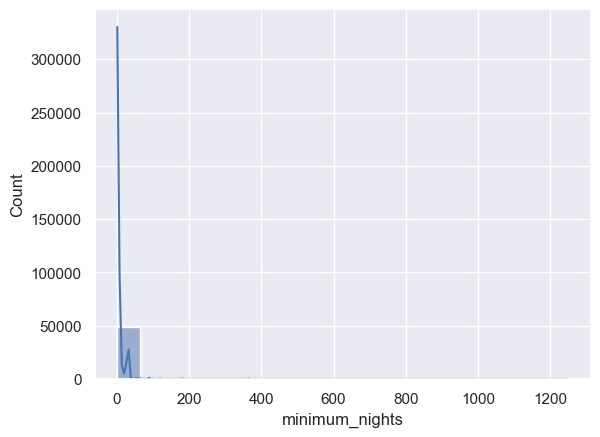

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64


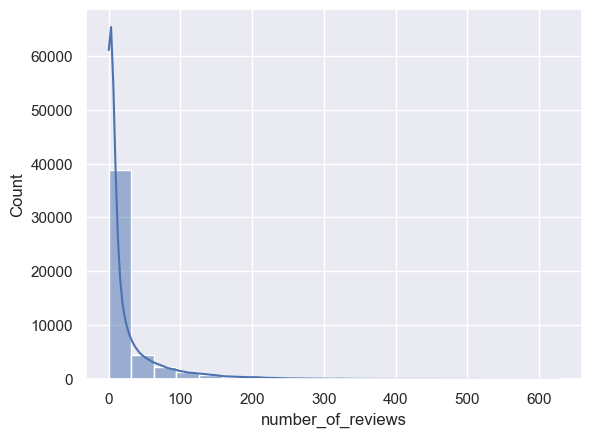

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64


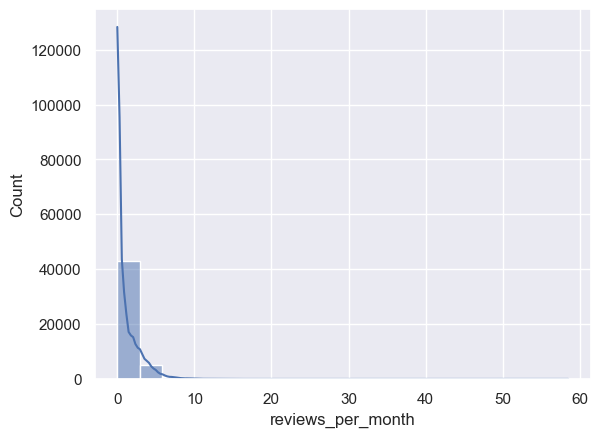

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64


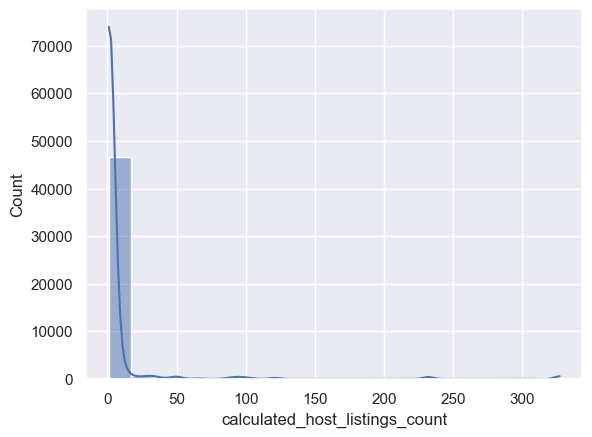

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


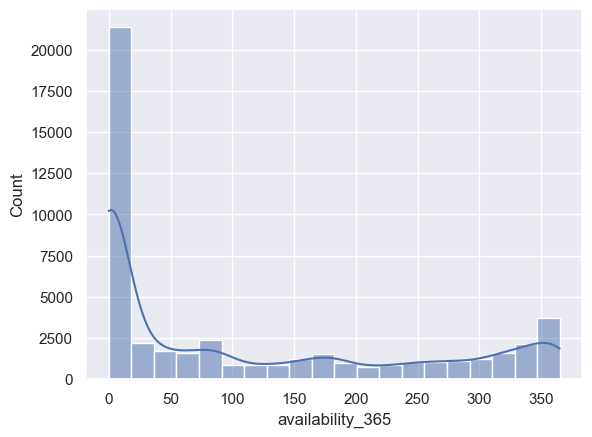

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64


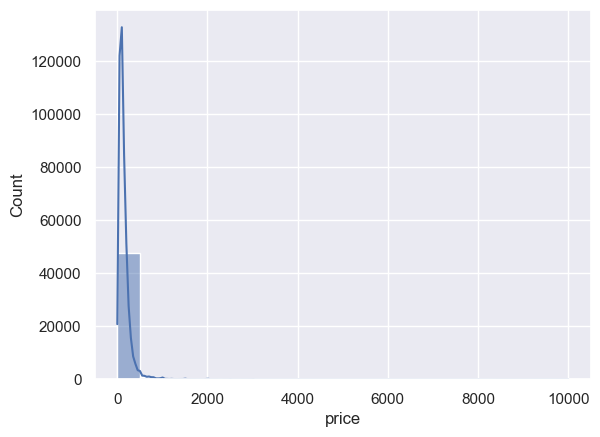

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


In [155]:
fig, axes = plt.subplots(figsize=(12, 6))

for column in selected_columns:
    sns.histplot(data=df, x=column, bins=20, kde=True)
    axes.set_xlabel(f"{column}")
    axes.set_ylabel("frequency")
    axes.set_title(f"Histogram for {column}")
    plt.show()
    print(df[column].describe())

In [156]:
"""
Dropping some of the irrelevant columns.
"""

df.drop(["id", "name", "host_id"], axis=1, inplace=True)

In [157]:
df["availability_365"]

0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48895, dtype: int64

In [158]:
"""
For the given dataset, we will be working on the feature "availability_365" as classification problem.
Such that classifying as 1 if the room is available for everyday of the year else classifying them as 0. 
 """

df["availability_365"] = df["availability_365"].apply(lambda x: 1 if x == 365 else 0)

In [159]:
df["availability_365"].value_counts() / len(df["availability_365"])

availability_365
0    0.973515
1    0.026485
Name: count, dtype: float64

FROM ABOVE WE CAN SEE THE IMBALANCE IN OUR DATASET.

PREPROCESSING

In [160]:
"""
One-hot encoding all of our categorical variables. 
"""


def onehot_encode(df1, columns, prefixes):
    df1 = df1.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df1[column], prefix=prefix, dtype=int)
        df1 = pd.concat([df1, dummies], axis=1)
        df1 = df1.drop(column, axis=1)
    return df1

In [161]:
df = onehot_encode(
    df,
    columns=["neighbourhood_group", "neighbourhood", "room_type"],
    prefixes=["G", "N", "R"],
)

In [162]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [163]:
"""
Dividing the columns for Input varibale and target vraiable.
"""

y = df["availability_365"].copy()
X = df.drop("availability_365", axis=1).copy()

In [164]:
y.value_counts()

availability_365
0    47600
1     1295
Name: count, dtype: int64

In [165]:
"""
Selecting all of our numerical varibales for pre-processing.
"""

columns = [
    "latitude",
    "longitude",
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "calculated_host_listings_count",
]

In [166]:
"""
Using StandarScaler to scale our data.
"""

X_scaled = X[columns]

scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(X_scaled), columns=columns)

In [167]:
scaled_data

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451
...,...,...,...,...,...,...,...
48890,-0.924616,0.048089,-0.344452,-0.245240,-0.522433,-0.682986,-0.156104
48891,-0.497141,0.411637,-0.469373,-0.147729,-0.522433,-0.682986,-0.156104
48892,1.573480,0.075821,-0.157070,0.144807,-0.522433,-0.682986,-0.186451
48893,0.523774,-0.843881,-0.406912,-0.293996,-0.522433,-0.682986,-0.034716


In [168]:
X.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [169]:
X.drop(columns=columns, axis=1, inplace=True)
X.head()

,G_Bronx,G_Brooklyn,G_Manhattan,G_Queens,G_Staten Island,N_Allerton,N_Arden Heights,N_Arrochar,N_Arverne,N_Astoria,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [170]:
X = pd.concat([X, scaled_data], axis=1)
X.head()

,G_Bronx,G_Brooklyn,G_Manhattan,G_Queens,G_Staten Island,N_Allerton,N_Arden Heights,N_Arrochar,N_Arverne,N_Astoria,...,R_Entire home/apt,R_Private room,R_Shared room,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451


In [171]:
"""
Splitting ore dataset on train nad test with train_size of 70%.
"""

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=200
)

SUPPORT VECTOR MACHINE

In [172]:
""" Created a Support Vector Classifier (SVC) with balanced class weights to handle imbalanced data.
The 'class_weight="balanced"' parameter assigns higher weights to minority class samples, 
helping the model better generalize and make more accurate predictions.
"""

from sklearn.svm import SVC

svc = SVC(class_weight="balanced")

svc.fit(X_train, y_train)

SVC(class_weight='balanced')

In [173]:
y_pred = svc.predict(X_test)

Confusion Matrix:
[[11766  2469]
 [  155   279]]


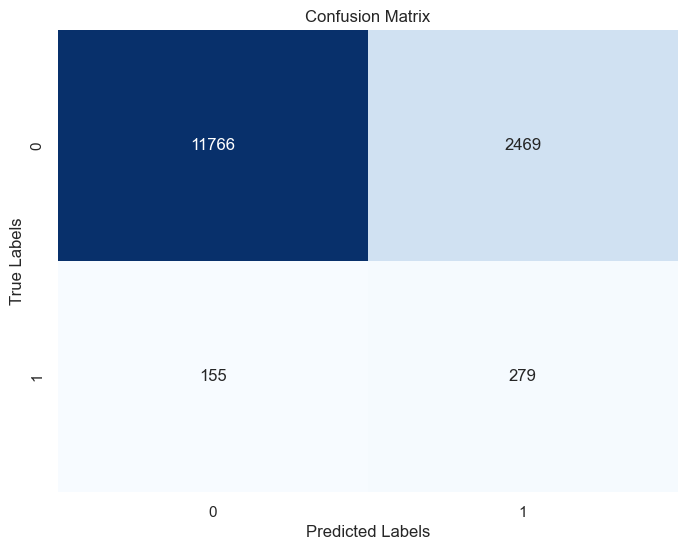

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14235
           1       0.10      0.64      0.18       434

    accuracy                           0.82     14669
   macro avg       0.54      0.73      0.54     14669
weighted avg       0.96      0.82      0.88     14669



In [174]:
"""
Calculating the confusion matrix for SVM, and plotted them.
"""
conf_matrix1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

In [175]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC:", roc_auc)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Calculate precision-recall curve and PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc}")

ROC AUC: 0.7347057052536504
Balanced Accuracy: 0.7347057052536505
PR-AUC Score: 0.3774760139602925


ROC-AUC Score: 0.7347057052536504


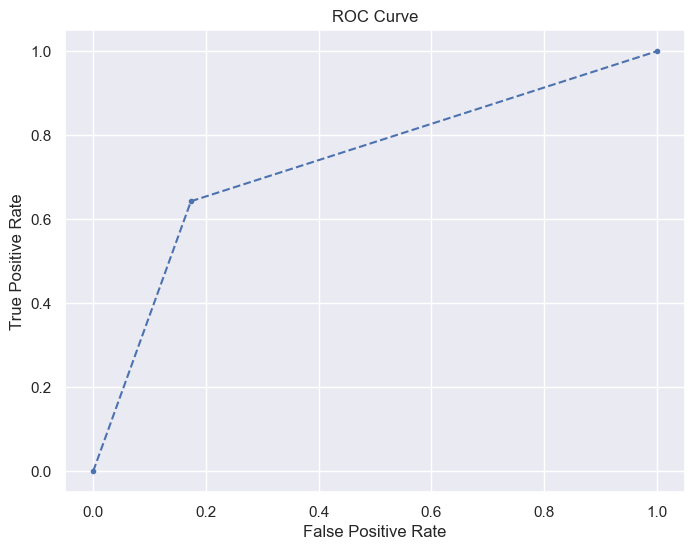

In [176]:
# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print(f"ROC-AUC Score: {roc_auc}")

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle="--", marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

DECISION TREE

In [177]:
"""
DecisionTreeClassifier with specified parameters.

Parameters:
    - criterion: Criterion for splitting nodes.
    - max_depth: Maximum depth of the tree.
    - min_samples_leaf: Minimum samples required in a leaf node.
    - min_samples_split: Minimum samples required to split an internal node.
    - max_features: Number of features to consider when splitting.
    - class_weight: Weight assigned to classes for handling imbalance.
    - random_state: Seed for random number generation.

Returns:
    - y_pred: Predicted class labels for the test data.
"""

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=10,
    min_samples_leaf=5,
    min_samples_split=10,
    max_features=None,
    class_weight="balanced",
    random_state=42,
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

Accuracy: 0.80
Confusion Matrix:
[[11530  2705]
 [  178   256]]


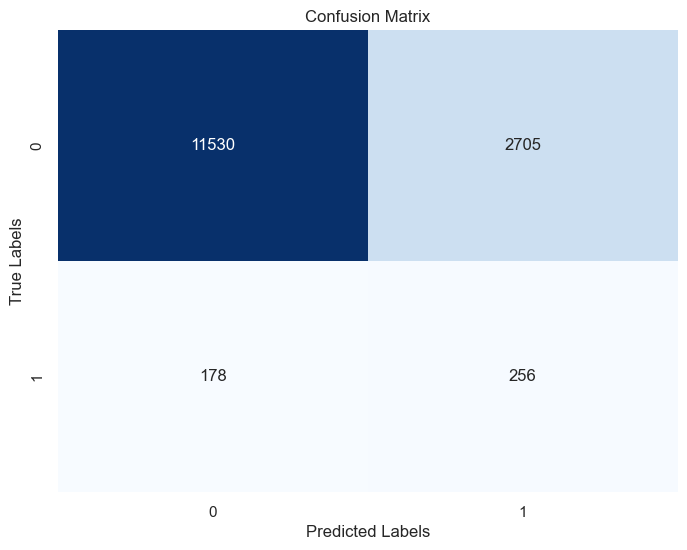

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     14235
           1       0.09      0.59      0.15       434

    accuracy                           0.80     14669
   macro avg       0.54      0.70      0.52     14669
weighted avg       0.96      0.80      0.87     14669



In [178]:
"""
Calculating the confusion matrix for DECISION TREE, and plotted them.
Also looking at the classification report.
"""

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix2 = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

In [179]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC:", roc_auc)

# Calculate precision-recall curve and PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc}")

ROC_AUC: 0.6999185819336062
PR-AUC Score: 0.3442267311285373


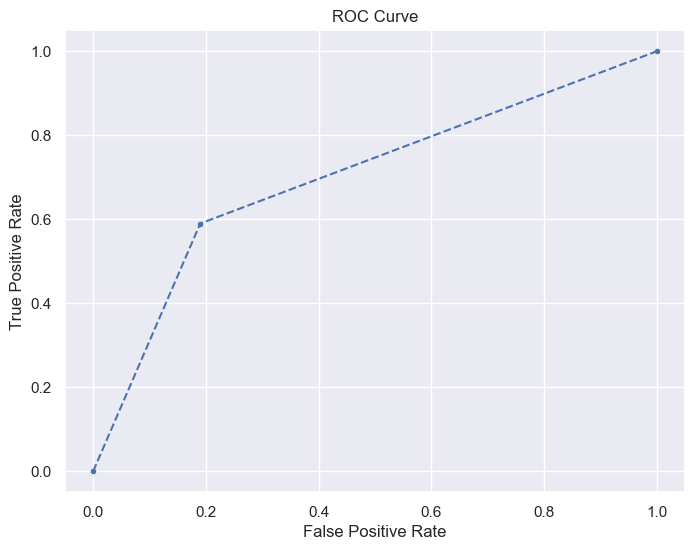

In [180]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle="--", marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

RANDOM FOREST  

In [181]:
"""
RandomForestClassifier with specified parameters.

Parameters:
    - n_estimators: Number of trees in the forest.
    - max_depth: Maximum depth of the individual trees.
    - random_state: Seed for random number generation.
    - class_weight: Weight assigned to classes for handling imbalance.

Returns:
    - y_pred: Predicted class labels for the test data.
"""

from sklearn.ensemble import RandomForestClassifier

imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
class_weights = {0: 1, 1: imbalance_ratio}

rf_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, class_weight=class_weights
)

rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

Accuracy: 0.8535687504260686
Confusion Matrix:
 [[12266  1969]
 [  179   255]]


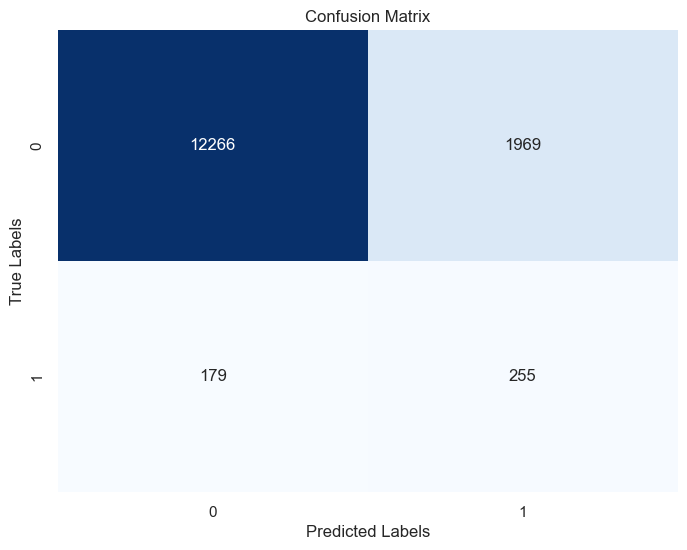

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92     14235
           1       0.11      0.59      0.19       434

    accuracy                           0.85     14669
   macro avg       0.55      0.72      0.56     14669
weighted avg       0.96      0.85      0.90     14669



In [182]:
"""
Calculating the confusion matrix for RANDOM FOREST, and plotted them.
Also looking at the classification report.
"""

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix3)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

In [183]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC:", roc_auc)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Calculate precision-recall curve and PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc}")

ROC_AUC: 0.7246182819978666
Balanced Accuracy: 0.7246182819978666
PR-AUC Score: 0.35720924059954584


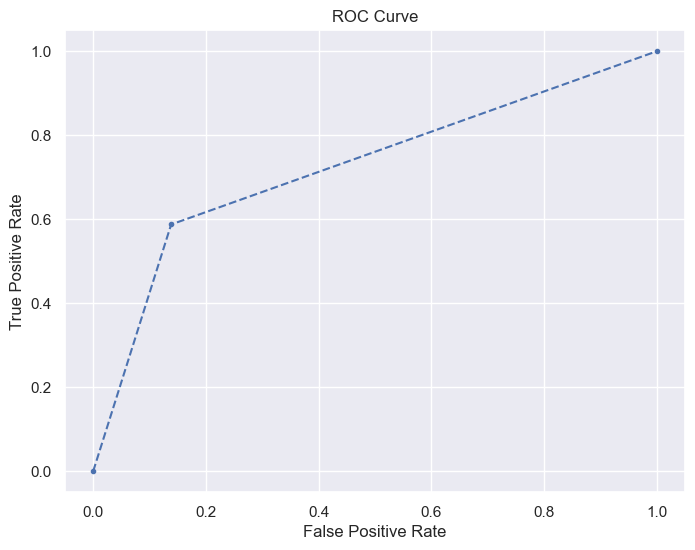

In [184]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle="--", marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

XGBOOST

In [185]:
import xgboost as xgb

In [186]:
"""
XGBoostClassifier with specified parameters.

Parameters:
    - objective: Learning task and objective function.
    - booster: Booster type (e.g., gbtree).
    - n_estimators: Number of boosting rounds (trees).
    - max_depth: Maximum depth of individual trees.
    - learning_rate: Step size shrinkage for boosting.
    - random_state: Seed for random number generation.
    - scale_pos_weight: Weight for balancing class imbalance.

Returns:
    - xgb_classifier: Trained XGBoost classifier.
"""


imbalance_ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_classifier = xgb.XGBClassifier(
    objective="binary:logistic",
    booster="gbtree",
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=imbalance_ratio,
)

In [187]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [188]:
y_pred = xgb_classifier.predict(X_test)

Accuracy: 0.7971913559206489
Confusion Matrix:
 [[11381  2854]
 [  121   313]]


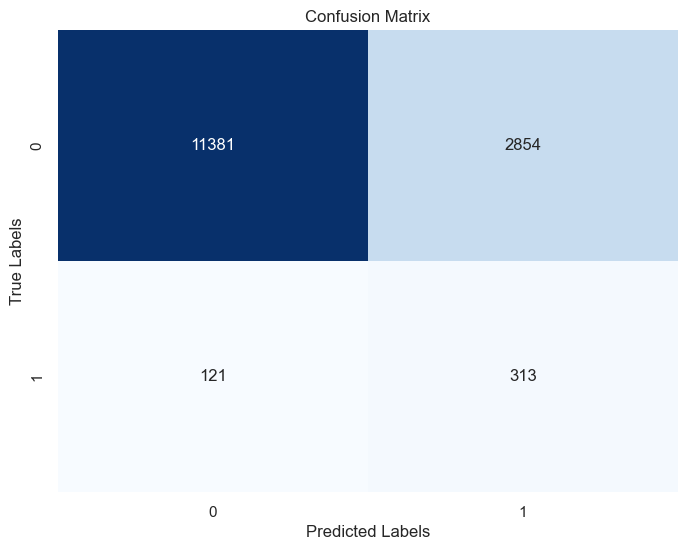

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88     14235
           1       0.10      0.72      0.17       434

    accuracy                           0.80     14669
   macro avg       0.54      0.76      0.53     14669
weighted avg       0.96      0.80      0.86     14669



In [189]:
"""
Calculating the confusion matrix for SVM, and plotted them.
Also looking at the classification report.
"""

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix4)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

In [190]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC:", roc_auc)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_acc)

# Calculate precision-recall curve and PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f"PR-AUC Score: {pr_auc}")

ROC_AUC: 0.7603532054924012
Balanced Accuracy: 0.7603532054924013
PR-AUC Score: 0.4141392731584572


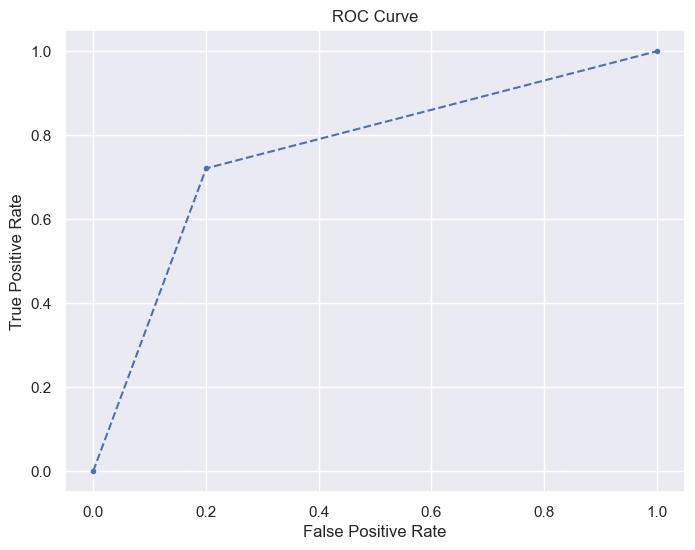

In [191]:
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle="--", marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()